<a href="https://www.kaggle.com/code/renatakuagowska/titanic-6-models?scriptVersionId=110859691" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import Libraries

# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# machine learning 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold, learning_curve,RandomizedSearchCV


from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

from tqdm import tqdm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# OVERVIEW

1. Data analysis

2. Feature Engineering
* > missing data (embarked,cabin,fare,age)
* > new info (taking title out of name, family bas on SibSp and Parch column)  

3. Visualisation

4. Preprocesing 

5. Models

* Naive Bayes
* Random Forest
* Logistic Regression
* Decision Tree
* K- nearest Neighbour
* SVM - Support Vector machine
* Soft Voting Clasifier

6. Model Tuned Performance 
* Random Forest 
* Logistic Regression
* Knn
* SVC
* GBC
* LDA


# 1. Data Analysis

In [2]:
# Load data 

df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.isnull().sum()/len(df_train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
df_test.isnull().sum()/len(df_test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Note:

- lack of data : Age (about 20%), Cabin (77%), Embarked and Fare (below 0,1%)
- Age in range: 0,17-80 
- Fare in range : 0-512 


# 2. Feature Engineering

In [12]:
# Merging data 

df=pd.concat([df_train,df_test],ignore_index=True)
print(df)

      PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                

In [13]:
# Missing data Embarked 

print(df.Embarked.value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


above number of passengers from all destinations was check. S - 69,9%. I will fill in S in gaps 

In [14]:
df_train= df_train.fillna({'Embarked':'S'})

In [15]:
# Missing data - Cabin 
# Cabin data begins with a letter then numbers. Do the letters represent the floors? or a specific part of the ship. Can be z parsed by letter.

df['cabin_l'] = df.Cabin.apply(lambda x: str(x)[0])

In [16]:
print(df.cabin_l.value_counts())

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_l, dtype: int64


In [17]:
print(df.groupby(["cabin_l"])["Survived"].value_counts(normalize=True))

cabin_l  Survived
A        0.0         0.533333
         1.0         0.466667
B        1.0         0.744681
         0.0         0.255319
C        1.0         0.593220
         0.0         0.406780
D        1.0         0.757576
         0.0         0.242424
E        1.0         0.750000
         0.0         0.250000
F        1.0         0.615385
         0.0         0.384615
G        0.0         0.500000
         1.0         0.500000
T        0.0         1.000000
n        0.0         0.700146
         1.0         0.299854
Name: Survived, dtype: float64


Noteworthy data, especially those with the letters D and E, B there 3 times more people survived.
The only question is why there are so many gaps in the data and whether these data mainly do not come from information from those who survived?
This data will bot be taken under consideration becouse too much missing data - job above was done for training reason :) 

In [18]:
# misssing data  - Fare 

df[pd.isnull(df['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_l
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,n


One missing data in Fare column. The fee depends on the class and distance. In this case it was class 3, embarked in S. 
So we may check median

In [19]:
val= df[(df['Pclass']==3) & (df['Embarked']=='S')]['Fare'].median()
print(val)

8.05


In [20]:
df_test['Fare'].fillna(value= 8.05,inplace=True)

In [21]:
# Missing data - age 
# 20% is a lot to fill in by mean or median. I will look at title in front of name. Calculate mean and median per title  

df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower()).value_counts()

 mr              757
 miss            260
 mrs             197
 master           61
 rev               8
 dr                8
 col               4
 mlle              2
 major             2
 ms                2
 lady              1
 sir               1
 mme               1
 don               1
 capt              1
 the countess      1
 jonkheer          1
 dona              1
Name: Name, dtype: int64

In [22]:
# create other group for positions which apear only 1 or 2 times

pop_title = ['mr','miss','mrs','master','dr','col']
df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other').value_counts()

mr        757
miss      260
mrs       197
master     61
other      22
dr          8
col         4
Name: Name, dtype: int64

In [23]:
# calculate mean and median per group 

x= df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other')
df.groupby(x)['Age'].agg([np.mean,np.median])

,mean,median
Name,,
col,54.000000,54.5
dr,43.571429,49.0
master,5.482642,4.0
miss,21.774238,22.0
mr,32.252151,29.0
mrs,36.994118,35.5
other,40.190476,40.0


In [24]:
# create new column with only title 

df_train['Title']= df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other')
df_test['Title']= df['Name'].map(lambda x:x.split(',')[1].split('.')[0].lower().strip()).map(lambda x:x if x in pop_title else 'other')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,mr


In [25]:
title_mapping = {'mr':0, 'miss':1, 'mrs':2, 'master':3, 'other':4, 'dr':5, 'col':6}
df_train['Title']=df_train['Title'].map(title_mapping)
df_test['Title']=df_test['Title'].map(title_mapping)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [26]:
df_train['Age'].fillna(df_train.groupby('Title')['Age'].transform("median"), inplace=True)
df_test['Age'].fillna(df_test.groupby('Title')['Age'].transform('median'), inplace=True)

In [27]:
# Age and correlation. I find this solution on Titanic - Advanced Feature Engineering Tutorial - to investigate 

df_train_corr = df_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_train_corr[df_train_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
15,Age,Pclass,0.354005
21,Age,SibSp,0.265602
31,Age,Parch,0.188122
37,Age,Fare,0.097944
38,Age,Title,0.091184
45,Age,Survived,0.078816
49,Age,PassengerId,0.042895


In [28]:
# correlation with Pcclass was chosen and as second level Sex- look beloe 

# df_train['Age'] = df_train.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
# df_test['Age'] = df_test.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [29]:
# code to improve :( - give error

#for dataset in df_train:
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 0),'Age']=29
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 1),'Age']=22
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 2),'Age']=35
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 3),'Age']=4
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 4),'Age']=40
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 5),'Age']=49
#    dataset.loc[(dataset['Age']== 0) & (dataset['Title'] == 6),'Age']=54

In [30]:
# to check if data fill in above was done corectly in both train and test df 
# cabin may have nulls 

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [32]:
# create new column Family. If 0 in SibSp and 0 in Parch then 0 else 1.

df_train['Family']= df_train['SibSp']+df['Parch']
df_train['Family'].loc[df_train['Family']>0]=1

df_train.Family.value_counts()

df_test['Family']= df_test['SibSp']+df['Parch']
df_test['Family'].loc[df_test['Family']>0]=1
df_test.Family.value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0.0    213
1.0    205
Name: Family, dtype: int64

# 3.Visualization


In [33]:
# Frequency 

def plotone(variable):
    #input : variable (agevs)
    
    varr = df_train[variable]
    varrcounter = varr.value_counts()
    plt.figure(figsize = (9,3))
    plt.bar(varrcounter.index,varrcounter)
    plt.xticks(varrcounter.index,varrcounter.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: /n {}".format(variable,varrcounter))

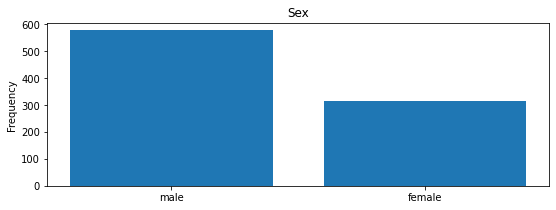

Sex: /n male      577
female    314
Name: Sex, dtype: int64


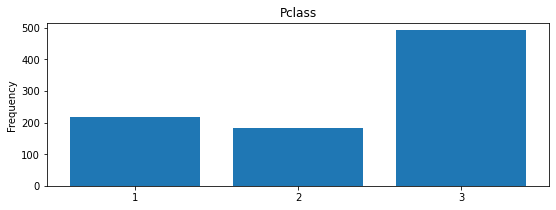

Pclass: /n 3    491
1    216
2    184
Name: Pclass, dtype: int64


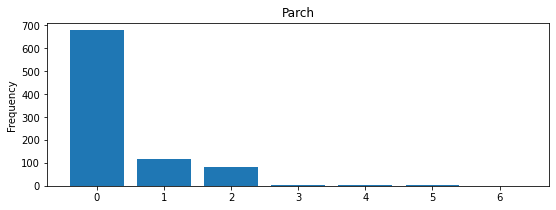

Parch: /n 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


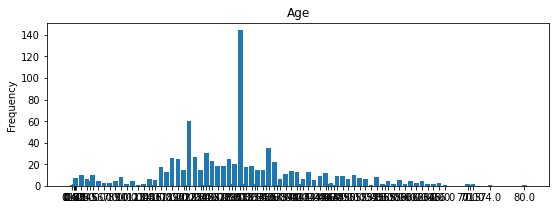

Age: /n 30.00    144
21.00     60
35.00     35
24.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 90, dtype: int64


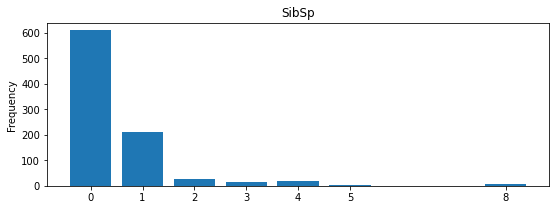

SibSp: /n 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


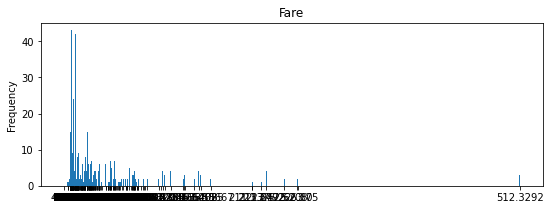

Fare: /n 8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


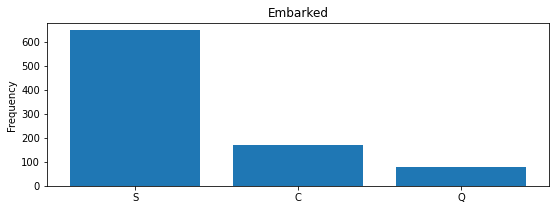

Embarked: /n S    646
C    168
Q     77
Name: Embarked, dtype: int64


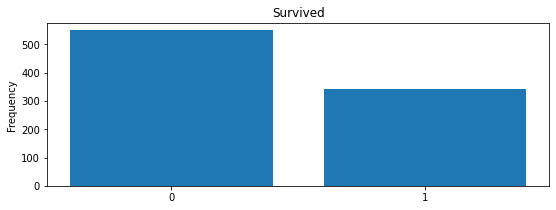

Survived: /n 0    549
1    342
Name: Survived, dtype: int64


In [34]:
cate = ["Sex","Pclass","Parch", "Age", "SibSp", "Fare","Embarked", "Survived"]

for xxx in cate:
    plotone(xxx)

Note:
- much more male then female,
- most in class 3
- mostly without parents and child
- most come from S

In [35]:
# Correlation

df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Family
PassengerId,1.000000,-0.005007,-0.035144,0.042895,-0.057527,-0.001652,0.012658,0.014884,-0.057462
Survived,-0.005007,1.000000,-0.338481,-0.078816,-0.035322,0.081629,0.257307,0.398648,0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.354005,0.083081,0.018443,-0.549500,-0.192399,-0.135207
Age,0.042895,-0.078816,-0.354005,1.000000,-0.265602,-0.188122,0.097944,-0.091184,-0.183889
SibSp,-0.057527,-0.035322,0.083081,-0.265602,1.000000,0.414838,0.159651,0.246119,0.584471
Parch,-0.001652,0.081629,0.018443,-0.188122,0.414838,1.000000,0.216225,0.285755,0.583398
Fare,0.012658,0.257307,-0.549500,0.097944,0.159651,0.216225,1.000000,0.134005,0.271832
Title,0.014884,0.398648,-0.192399,-0.091184,0.246119,0.285755,0.134005,1.000000,0.366831
Family,-0.057462,0.203367,-0.135207,-0.183889,0.584471,0.583398,0.271832,0.366831,1.000000


In [36]:
correlation_matrix = df_train.corr()
correlation_matrix.Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.078816
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Title          0.398648
Family         0.203367
Name: Survived, dtype: float64

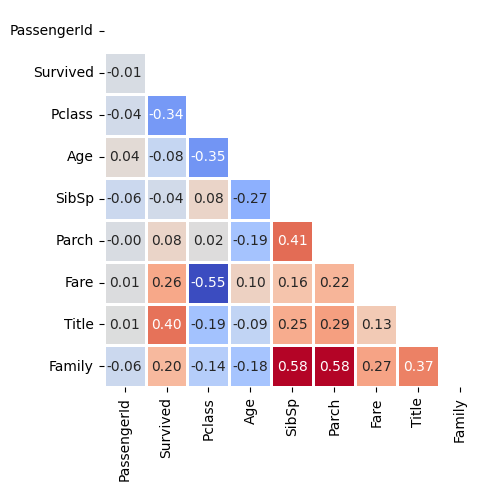

In [37]:
mask = np.triu(correlation_matrix)

plt.figure(figsize=(5, 5), dpi=100)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

Note:


In [38]:
# pivot = who sirvived

pd.pivot_table(df_train,index='Survived', values = ['Age','SibSp','Parch','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.214936,22.117887,0.329690,2.531876,0.553734
1,28.066287,48.395408,0.464912,1.950292,0.473684


Note:
who had a better chance of survival:
- youngest ? 
- who paid more? 
- if you traveled with your parents or children?
- in business class?

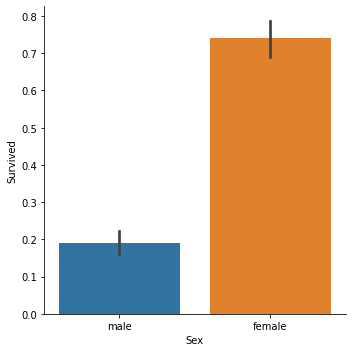

In [39]:
# categorical data viz

sns.catplot(data=df_train, x='Sex', y='Survived',kind='bar')

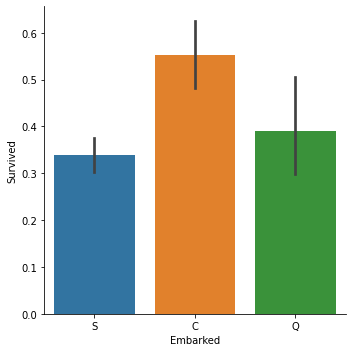

In [40]:
sns.catplot(data=df_train, x='Embarked', y='Survived',kind='bar')

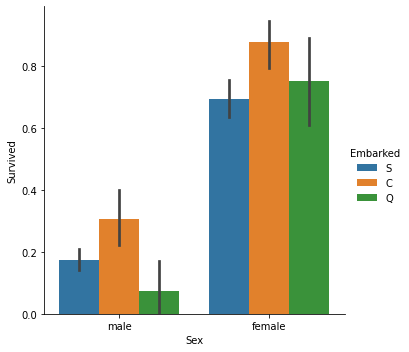

In [41]:
sns.catplot(data=df_train, x='Sex', y='Survived',kind='bar', hue='Embarked')

In [42]:
print(pd.pivot_table(data=df_train, index ='Survived', columns = 'Sex', values ='Ticket',aggfunc= 'count'  ))

Sex       female  male
Survived              
0             81   468
1            233   109


In [43]:
print(pd.pivot_table(data=df_train, index ='Survived', columns = 'Embarked', values ='Ticket',aggfunc= 'count'  ))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


In [44]:
print(df_train.groupby(["Pclass","Sex"])["Survived"].value_counts(normalize=True))

Pclass  Sex     Survived
1       female  1           0.968085
                0           0.031915
        male    0           0.631148
                1           0.368852
2       female  1           0.921053
                0           0.078947
        male    0           0.842593
                1           0.157407
3       female  0           0.500000
                1           0.500000
        male    0           0.864553
                1           0.135447
Name: Survived, dtype: float64


Conclusions

- Women were more likely to survive
- Passengers from C = Cherbourg had a better chance, interestingly, 
- men from C = Cherbourg had a disproportionately lower chance

# 4. Preprocesing

In [45]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1.0


In [46]:
# Create age bins

df_train['AgeBin']= pd.cut(x=df_train.Age, bins=5, labels=[0,1,2,3,4])
df_test['AgeBin']= pd.cut(x=df_train.Age, bins=5, labels=[0,1,2,3,4])

In [47]:
# 4 create fare bins

df_train['FareBin']= pd.cut(x=df.Fare, bins=4, labels=[0,1,2,3])
df_test['FareBin']= pd.cut(x=df.Fare, bins=4, labels=[0,1,2,3])
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,AgeBin,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1.0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1.0,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.0,2,0


In [48]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,AgeBin,FareBin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,1.0,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,0.0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,0.0,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1.0,2,0


In [49]:
df_test = df_test.drop(['Name','Ticket','Cabin','Age','Fare','SibSp'],axis=1)
df_train = df_train.drop(['Name','Ticket','Cabin','Age','Fare','SibSp'],axis=1)
df_train.head(2)

,PassengerId,Survived,Pclass,Sex,Parch,Embarked,Title,Family,AgeBin,FareBin
0,1,0,3,male,0,S,0,1.0,1,0
1,2,1,1,female,0,C,2,1.0,2,0


In [50]:
df_test.head()

,PassengerId,Pclass,Sex,Parch,Embarked,Title,Family,AgeBin,FareBin
0,892,3,male,0,Q,0,0.0,1,0
1,893,3,female,0,S,2,1.0,2,0
2,894,2,male,0,Q,1,0.0,1,0
3,895,3,male,0,S,2,0.0,2,0
4,896,3,female,1,S,0,1.0,2,0


In [51]:
df_train.corr()

,PassengerId,Survived,Pclass,Parch,Title,Family
PassengerId,1.000000,-0.005007,-0.035144,-0.001652,0.014884,-0.057462
Survived,-0.005007,1.000000,-0.338481,0.081629,0.398648,0.203367
Pclass,-0.035144,-0.338481,1.000000,0.018443,-0.192399,-0.135207
Parch,-0.001652,0.081629,0.018443,1.000000,0.285755,0.583398
Title,0.014884,0.398648,-0.192399,0.285755,1.000000,0.366831
Family,-0.057462,0.203367,-0.135207,0.583398,0.366831,1.000000


In [52]:
# labelEncoder - categorical Value 

le= preprocessing.LabelEncoder()

cols= ['Sex', 'Embarked']  

for col in cols:
    df_train[col]=le.fit_transform(df_train[col])
    df_test[col]=le.transform(df_test[col])
    print(le.classes_)
    
df_test.head()

['female' 'male']
['C' 'Q' 'S']


,PassengerId,Pclass,Sex,Parch,Embarked,Title,Family,AgeBin,FareBin
0,892,3,1,0,1,0,0.0,1,0
1,893,3,0,0,2,2,1.0,2,0
2,894,2,1,0,1,1,0.0,1,0
3,895,3,1,0,2,2,0.0,2,0
4,896,3,0,1,2,0,1.0,2,0


# 5. Models 

In [53]:
target = df_train['Survived']
data = df_train.drop('Survived', axis=1)
data.head()

,PassengerId,Pclass,Sex,Parch,Embarked,Title,Family,AgeBin,FareBin
0,1,3,1,0,2,0,1.0,1,0
1,2,1,0,0,0,2,1.0,2,0
2,3,3,0,0,2,1,0.0,1,0
3,4,1,0,0,2,2,1.0,2,0
4,5,3,1,0,2,0,0.0,2,0


In [54]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=42)

In [55]:
print(x_train[:3])

     PassengerId  Pclass  Sex  Parch  Embarked  Title  Family AgeBin FareBin
298          299       1    1      0         2      0     0.0      1       0
884          885       3    1      0         2      0     0.0      1       0
247          248       2    0      2         2      2     1.0      1       0


In [56]:
print(x_test[:3])

     PassengerId  Pclass  Sex  Parch  Embarked  Title  Family AgeBin FareBin
709          710       3    1      1         0      3     1.0      0       0
439          440       2    1      0         2      0     0.0      1       0
840          841       3    1      0         2      0     0.0      1       0


In [57]:
print(y_train[:3])

298    1
884    0
247    1
Name: Survived, dtype: int64


In [58]:
print(y_test[:3])

709    1
439    0
840    0
Name: Survived, dtype: int64


In [59]:
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(668, 9) (223, 9) (668,) (223,)


# Models 
1. Naive Bayes
2. Random Forest 
3. Logistic Regression
4. Decision Tree
5. K- nearest Neighbour
6. SVM - Support Vector machine
7. Soft Voting Clasifier 

# 1. Naive Bayes

In [60]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [61]:
nb.score(x_train,y_train)

0.7904191616766467

In [62]:
# ## do_sub_pred  = nb.predict(df_test)

In [63]:
# cross validation 

cv = cross_val_score(nb,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78358209 0.85820896 0.70895522 0.77443609 0.81954887]
0.7889462462125463


# 2. Random forest



In [64]:
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [65]:
rf.score(x_train,y_train)

1.0

In [66]:
# cross validation

cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76119403 0.79850746 0.7238806  0.7518797  0.78947368]
0.7649870946021771


In [67]:
# y_pred_RF= rf.predict(x_test)

# 3. Logistic regression

In [68]:
lr = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)
prediction = lr.predict(x_test)
accuracy_score(y_test,prediction)

0.7757847533632287

In [69]:
# cross validation 

# lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.81343284 0.85820896 0.76865672 0.7518797  0.84210526]
0.8068566939737403


# 4.Decision Tree

In [70]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(x_train,y_train)
dt.score(x_train,y_train)

0.8383233532934131

In [71]:
# cross validation 

cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78358209 0.79850746 0.76865672 0.76691729 0.81203008]
0.7859387274155537


In [72]:
# ## prediction = dt.predict(df_test)

# 5. K-nearest neighbour

In [73]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.7125748502994012

In [74]:
# cross validation

cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.56716418 0.61940299 0.57462687 0.51879699 0.5037594 ]
0.556750084165638


# 6. SVM - Support Vector machine

In [75]:
svc = SVC(probability = True)
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.600896860986547

In [76]:
# cross validation
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.61940299 0.61940299 0.61940299 0.62406015 0.62406015]
0.6212658511951521


In [77]:
# ## prediction= svc.predict(df_test)

# 7. Soft Voting Clasifier

Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" 
and the result is just a popular vote. For this, you generally want odd numbers
A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted 
as such

In [78]:
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('nb',nb),('svc',svc)], voting = 'soft') 
cv = cross_val_score(voting_clf,x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7761194  0.86567164 0.7761194  0.76691729 0.81203008]
0.7993715632364493


In [79]:
# voting_clf.fit(x_train,y_train)
# do_sub_pred = voting_clf.predict(df_test).astype(int)

- ALL TOGETHER 

 23%|██▎       | 3/13 [00:03<00:11,  1.19s/it]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

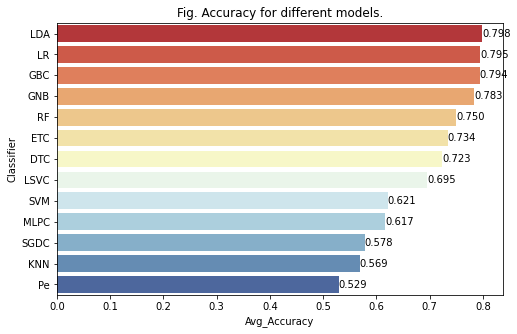

In [80]:
# Cross validate model with Kfold stratified cross val

kfold = StratifiedKFold(n_splits=10)

random_state = 2

classifiers = {
    "RF": RandomForestClassifier(random_state=random_state),
    "GBC": GradientBoostingClassifier(random_state=random_state),
    "ETC":ExtraTreesClassifier(random_state=random_state),
    "LDA": LinearDiscriminantAnalysis(),
    "LR": LogisticRegression(), 
    "Pe": Perceptron(random_state=random_state), # supervised learning of binary classifiers
    "SGDC": SGDClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier(), 
    "DTC": DecisionTreeClassifier(random_state=random_state),
    "MLPC": MLPClassifier(),
    "SVM": SVC(random_state=random_state), # supervised learning of binary classifiers 
    "LSVC": LinearSVC(random_state=random_state),
    "GNB": GaussianNB()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy"])
for name, clf in tqdm(classifiers.items()):
    model = clf
    cv_results = cross_validate(
        model, x_train, y_train, cv=kfold,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
    }, ignore_index=True)
    
results = results.sort_values("Avg_Accuracy", ascending=False)

fig = plt.figure(figsize = (8,5))
chart = sns.barplot(x="Avg_Accuracy",y="Classifier",data = results, palette = "RdYlBu")
chart.bar_label(chart.containers[0],fmt='%.3f')
chart.set_title('Fig. Accuracy for different models.')

plt.show()   

# Model Tuned Performance 
1. Random Forest 
2. Logistic Regression
3. Knn
4. SVC
5. GBC
6. LDA

In [81]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [82]:
# Random Forest 

# parameters = {'max_depth':[5, 6, 7, 8, 9],'min_samples_split':[2, 4, 8, 16],'min_samples_leaf':[2, 4, 8, 16, 32] }

# scorer = make_scorer(f1_score)

# grid_obj_rf = GridSearchCV(rf, parameters, scoring=scorer)
# grid_fit_rf = grid_obj_rf.fit(x_train, y_train)
# clf_performance(grid_fit_rf,'Random Forest')

In [83]:
# y_submission = grid_fit_rf.predict(df_test) 

In [84]:
# Logistic Regression 

#lr = LogisticRegression()
#param_grid = {'max_iter' : [2000],
#             'penalty' : ['l1', 'l2'],
#             'C' : np.logspace(-4, 4, 20),
#             'solver' : ['liblinear']}

#clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
#best_clf_lr = clf_lr.fit(x_train,y_train)
#clf_performance(best_clf_lr,'Logistic Regression')

In [85]:
# sub_pred = best_clf_lr.predict(df_test)

In [86]:
# KNN

# knn = KNeighborsClassifier()
# param_grid = {'n_neighbors' : [3,5,7,9],
#              'weights' : ['uniform', 'distance'],
#              'algorithm' : ['auto', 'ball_tree','kd_tree'],
#              'p' : [1,2]}
# clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
# best_clf_knn = clf_knn.fit(x_train,y_train)
# clf_performance(best_clf_knn,'KNN')


In [87]:
# prediction = best_clf_knn.predict(df_test)

In [88]:
## SVC (svc- i 3 line look at 6. SVC)

# parameters = {'kernel':['linear', 'poly', 'rbf'],'C':[0.1, 1, 10]}

# scorer = make_scorer(f1_score)

# grid_obj_SVC = GridSearchCV(svc, parameters, scoring=scorer)
# grid_fit_SVC = grid_obj_SVC.fit(x_train, y_train)
#clf_performance(grid_fit_SVC,'SVC')
# ##best_svm = grid_fit.best_estimator_

In [89]:
# best_svm.score(x_train, y_train)

In [90]:
# ## prediction= grid_fit_SVC.predict(df_test)

In [91]:
# GBC 
# GBC = GradientBoostingClassifier()
# GBC_parameters = {'n_estimators':[5,10,50],
#                  'learning_rate':[0.01,0.1,1],
#                  'random_state': [0,1,2,3]}

# GBC_grid = GridSearchCV(GBC, GBC_parameters, 
#                         refit=True, scoring="accuracy", verbose=1, cv=kfold)
# GBC_grid.fit(x_train,y_train)

# GBC_best = GBC_grid.best_estimator_

# print(GBC_grid.best_score_, GBC_grid.best_estimator_)


In [92]:
# sub_pred = GBC_best.predict(df_test)

In [93]:
# # LDA 
LDA = LinearDiscriminantAnalysis()
LDA_parameters = {'solver': ['svd', 'lsqr', 'eigen']}

LDA_grid = GridSearchCV(LDA, LDA_parameters, 
                        refit=True, scoring="accuracy", verbose=1, cv=kfold)
LDA_grid.fit(x_train,y_train)

LDA_best = LDA_grid.best_estimator_

print(LDA_grid.best_score_,LDA_grid.best_estimator_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
0.7980099502487562 LinearDiscriminantAnalysis()


In [94]:
sub_pred = LDA_best.predict(df_test)

SUBMISSION

In [95]:
test_ids = df_test["PassengerId"]
sub_pred = LDA_best.predict(df_test)

submission = pd.DataFrame({"PassengerId": test_ids.values, "Survived": sub_pred})
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
